In [1]:
def parse(path):
  g = gzip.open(path, 'r')
  for l in g:
    yield json.loads(l)

In [13]:
import gzip
from tqdm import tqdm
path_to_file = "review-New_York_10.json.gz"

# Let's load all data
data = []
for i, d in tqdm(enumerate(parse(path_to_file))):  
    data.append(d)

18661975it [02:59, 103963.32it/s]


In [17]:
import pandas as pd
# Convert to DataFrame
df = pd.DataFrame(data)

# Preview the data
df.head()

,user_id,name,time,rating,text,pics,resp,gmap_id
0,113722104692308235141,Alvin Martinez,1603494795361,5,I'm late to posting this but this store especi...,[{'url': ['https://lh5.googleusercontent.com/p...,None,0x89c25fc9494dce47:0x6d63c807b59a55
1,107293441492109320298,Johnnie Jackson,1620157037403,1,Very dissatisfied I did not get my phone the p...,None,"{'time': 1620268360920, 'text': 'We pride ours...",0x89c25fc9494dce47:0x6d63c807b59a55
2,100378585801819400296,Manie Blazer,1597431662039,5,Excellent very well done with professional car...,None,None,0x89c25fc9494dce47:0x6d63c807b59a55
3,114998161153019826512,Fashion Fiinds,1543773862044,5,Basing my review strictly on the service I rec...,None,"{'time': 1543855317372, 'text': 'Thanks for th...",0x89c25fc9494dce47:0x6d63c807b59a55
4,117178185728422297915,Andres Rieloff,1597279097718,1,Bad! Disorganized. I'm being totally honest. I...,None,None,0x89c25fc9494dce47:0x6d63c807b59a55


In [111]:
df_sampled = df.sample(n=10000, random_state=42)
df_sampled

,user_id,rating,text,gmap_id
2363707,113564694643974223253,5,"Great coffee & donuts, plus!",0x89e82fcc44386585:0xf3d3b5ccf2c18501
8104924,106108700176893194365,5,None,0x89d37403c76a7287:0xad1e1158405e7379
707678,101647825054077665263,5,None,0x89c258e2cfc41749:0xa890b333fc889a03
7978961,101701595549116309165,5,None,0x89d3a298b5852479:0x32983d0d7777fdb9
16684439,102121998027632943441,5,👌👌,0x89c259a8ef657243:0x9185d801317e2d9d
...,...,...,...,...
5051667,104181741037321372066,5,"Quality, selection and more quality",0x89c25baa0865c299:0x13b7a51a508c3374
11187824,109148814688929592082,5,None,0x89c2606f68f89b7f:0x609f5178585763c2
11448741,101727937516316216390,5,Try the grandma's pie and the coconut sweet po...,0x89c292e84262eefb:0x2c8442f1b5613cee
8487025,109776738927936170487,5,None,0x89c25bade4f8471b:0x41198734904b71f6


In [113]:
df_sampled=df_sampled.drop(columns=['name', 'time', 'pics', 'resp'])

KeyError: "['name', 'time', 'pics', 'resp'] not found in axis"

In [115]:
import re

def clean_translation(review):
    if '(translated by google)' in review:
        # Case 1: There's an Original part
        translated_match = re.search(
            r'\(translated by google\)\s*(.*?)\s*(?:\(original|\Z)', 
            review, 
            re.DOTALL | re.IGNORECASE
        )
        if translated_match:
            return translated_match.group(1).strip().replace('\n', '')
        else:
            # Case 2: No Original part, just remove the label
            return review.replace('(translated by google)', '').strip().replace('\n', '')
    else:
        return review.replace('\n', '')


In [117]:
def remove_emojis(text):
    emoji_pattern = re.compile(
        "[" 
        u"\U0001F600-\U0001F64F"
        u"\U0001F300-\U0001F5FF"
        u"\U0001F680-\U0001F6FF"
        u"\U0001F1E0-\U0001F1FF"
        "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

In [207]:
# remove stopwords
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))
custom_stopwords = {"he", "she", "we", "me", "was", "were", "they", "the", "that", "to"}  # add if needed
positive_words = ["good", "great", "excellent", "love", "amazing", "happy"]
negative_words = ["bad", "terrible", "worst", "hate", "disappointing", "awful"]

def remove_stopwords(text):
    tokens = text.lower().split()
    filtered_tokens = [word for word in tokens if word not in stop_words and word not in custom_stopwords and word not in positive_words and word not in negative_words]
    return " ".join(filtered_tokens)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\madel\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [209]:
df_cleaned = df_sampled.dropna()
df_cleaned.drop_duplicates(inplace=True)
df_cleaned.reset_index()
df_cleaned['clean_review'] = df_cleaned['text'].str.lower()
df_cleaned['clean_review']=df_cleaned['clean_review'].replace('\n', ' ')
df_cleaned['clean_review']=df_cleaned['clean_review'].apply(clean_translation)
df_cleaned['clean_review']=df_cleaned['clean_review'].apply(remove_emojis)
df_cleaned['clean_review']=df_cleaned['clean_review'].apply(remove_stopwords)
df_cleaned

,user_id,rating,text,gmap_id,clean_review
2363707,113564694643974223253,5,"Great coffee & donuts, plus!",0x89e82fcc44386585:0xf3d3b5ccf2c18501,"coffee & donuts, plus!"
16684439,102121998027632943441,5,👌👌,0x89c259a8ef657243:0x9185d801317e2d9d,
7929264,101324914199828592760,5,"Great coffee shop, better espresso (and espres...",0x89c2598b100f9865:0x6b41d5e7852d0cbd,"coffee shop, better espresso (and espresso bev..."
7853476,115689816368267601373,5,Fast check out,0x89c265da70342425:0x10448a1401930e6e,fast check
3278029,109205283840018891624,4,Updating and processing forward in Shopping Care.,0x89c26758d471c9d7:0x3ad64ce64657c5f5,updating processing forward shopping care.
...,...,...,...,...,...
1995219,111478413726922858485,4,Good customer service,0x89c2dd4ef0038e4b:0xacf447643a82e5df,customer service
16203560,117071832739994162170,5,(Translated by Google) Bialiilcious\n\n(Origin...,0x89c259762e26a813:0xf37426d261b7d2db,bialiilcious
5051667,104181741037321372066,5,"Quality, selection and more quality",0x89c25baa0865c299:0x13b7a51a508c3374,"quality, selection quality"
11448741,101727937516316216390,5,Try the grandma's pie and the coconut sweet po...,0x89c292e84262eefb:0x2c8442f1b5613cee,try grandma's pie coconut sweet potato fries.....


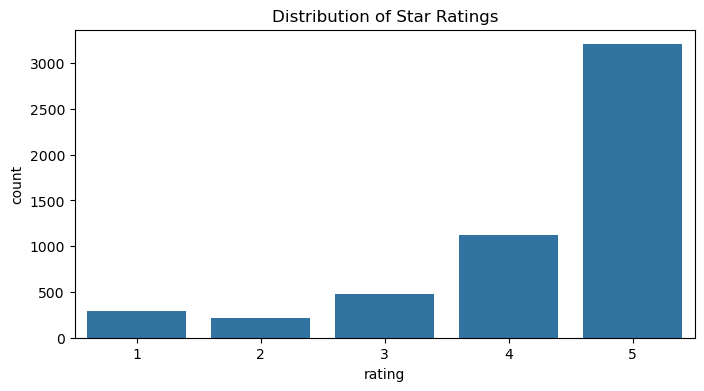

In [211]:
# EDA
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of ratings
plt.figure(figsize=(8,4))
sns.countplot(data=df_cleaned, x='rating', order=sorted(df_cleaned['rating'].unique()))
plt.title("Distribution of Star Ratings")
plt.show()

In [83]:
# theme extraction (topic modelling)
!pip install bertopic
!pip install umap-learn

     ---------------------------------------- 0.0/44.0 kB ? eta -:--:--
     ---------------------------------------- 44.0/44.0 kB 2.1 MB/s eta 0:00:00
   ---------------------------------------- 0.0/143.7 kB ? eta -:--:--
   ----------- ---------------------------- 41.0/143.7 kB ? eta -:--:--
   ----------- ---------------------------- 41.0/143.7 kB ? eta -:--:--
   ---------------------- ---------------- 81.9/143.7 kB 573.4 kB/s eta 0:00:01
   -------------------------------------- 143.7/143.7 kB 850.1 kB/s eta 0:00:00
   ---------------------------------------- 0.0/726.2 kB ? eta -:--:--
   ---------------------- ---------------- 419.8/726.2 kB 13.2 MB/s eta 0:00:01
   --------------------------------- ------ 614.4/726.2 kB 7.7 MB/s eta 0:00:01
   ---------------------------------------- 726.2/726.2 kB 7.6 MB/s eta 0:00:00
   ---------------------------------------- 0.0/275.9 kB ? eta -:--:--
   --------------------------------------- 275.9/275.9 kB 17.7 MB/s eta 0:00:00
   --------

In [259]:
from bertopic import BERTopic

# Extract the reviews for modeling
docs = df_cleaned['clean_review'].tolist()

# Create BERTopic model
topic_model = BERTopic(language="english", verbose=True, nr_topics=30)

# Extract topics and probabilities
topics, probs = topic_model.fit_transform(docs)

# Add topics back to DataFrame
df_cleaned['topic'] = topics

2025-03-13 16:17:52,892 - BERTopic - Embedding - Transforming documents to embeddings.


Batches:   0%|          | 0/167 [00:00<?, ?it/s]

2025-03-13 16:18:13,031 - BERTopic - Embedding - Completed ✓
2025-03-13 16:18:13,031 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2025-03-13 16:18:15,615 - BERTopic - Dimensionality - Completed ✓
2025-03-13 16:18:15,615 - BERTopic - Cluster - Start clustering the reduced embeddings
2025-03-13 16:18:16,026 - BERTopic - Cluster - Completed ✓
2025-03-13 16:18:16,028 - BERTopic - Representation - Extracting topics from clusters using representation models.
2025-03-13 16:18:16,209 - BERTopic - Representation - Completed ✓
2025-03-13 16:18:16,212 - BERTopic - Topic reduction - Reducing number of topics
2025-03-13 16:18:16,334 - BERTopic - Topic reduction - Reduced number of topics from 98 to 30


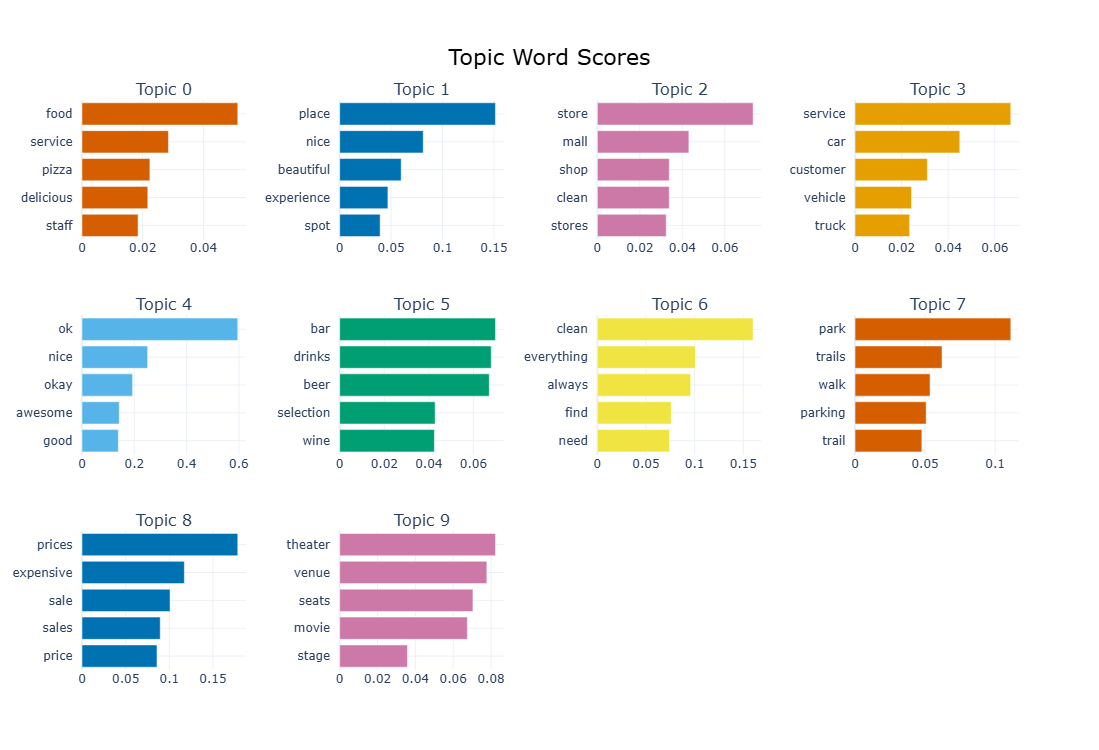

In [261]:
topic_model.get_topic_info()

# Visualize top topics
topic_model.visualize_barchart(top_n_topics=10)

In [263]:
df_cleaned

,user_id,rating,text,gmap_id,clean_review,topic
2363707,113564694643974223253,5,"Great coffee & donuts, plus!",0x89e82fcc44386585:0xf3d3b5ccf2c18501,"coffee & donuts, plus!",-1
16684439,102121998027632943441,5,👌👌,0x89c259a8ef657243:0x9185d801317e2d9d,,4
7929264,101324914199828592760,5,"Great coffee shop, better espresso (and espres...",0x89c2598b100f9865:0x6b41d5e7852d0cbd,"coffee shop, better espresso (and espresso bev...",15
7853476,115689816368267601373,5,Fast check out,0x89c265da70342425:0x10448a1401930e6e,fast check,28
3278029,109205283840018891624,4,Updating and processing forward in Shopping Care.,0x89c26758d471c9d7:0x3ad64ce64657c5f5,updating processing forward shopping care.,-1
...,...,...,...,...,...,...
1995219,111478413726922858485,4,Good customer service,0x89c2dd4ef0038e4b:0xacf447643a82e5df,customer service,3
16203560,117071832739994162170,5,(Translated by Google) Bialiilcious\n\n(Origin...,0x89c259762e26a813:0xf37426d261b7d2db,bialiilcious,25
5051667,104181741037321372066,5,"Quality, selection and more quality",0x89c25baa0865c299:0x13b7a51a508c3374,"quality, selection quality",-1
11448741,101727937516316216390,5,Try the grandma's pie and the coconut sweet po...,0x89c292e84262eefb:0x2c8442f1b5613cee,try grandma's pie coconut sweet potato fries.....,-1


In [265]:
# finding correlation between topics and star ratings:
# Group by topic and calculate average rating
df_top10 = df_cleaned[df_cleaned['topic'].isin(range(10))]
topic_ratings = df_top10.groupby('topic')['rating'].agg(['count', 'mean']).reset_index()

# Sort by highest-rated themes
topic_ratings.sort_values('mean', ascending=False)

,topic,count,mean
1,1,264,4.617424
7,7,117,4.418803
0,0,1194,4.331658
4,4,168,4.327381
5,5,159,4.301887
9,9,105,4.295238
6,6,151,4.264901
2,2,232,4.125000
3,3,223,4.103139
8,8,113,3.982301


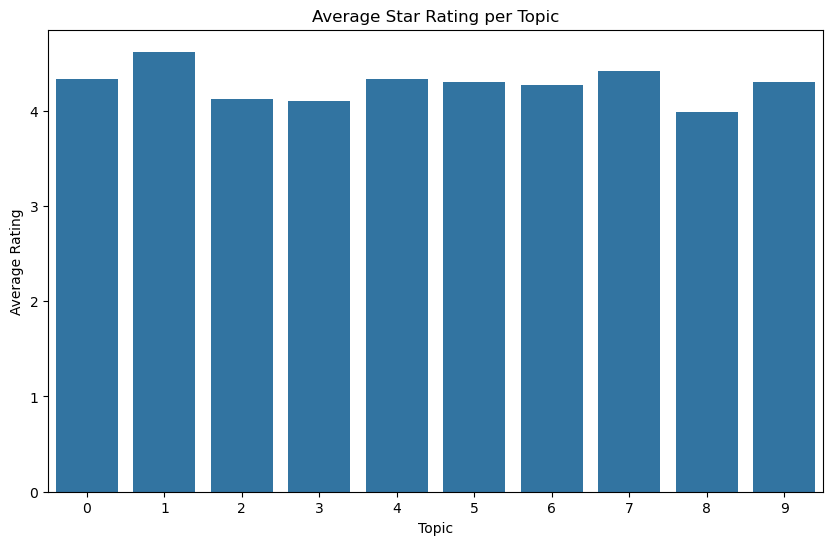

In [267]:
plt.figure(figsize=(10,6))
sns.barplot(data=topic_ratings, x='topic', y='mean')
plt.title('Average Star Rating per Topic')
plt.xlabel('Topic')
plt.ylabel('Average Rating')
plt.show()

In [253]:
# interpret topic themes:
for topic_num in topic_ratings['topic']:
    print(f"\nTopic {topic_num}:")
    print(topic_model.get_topic(topic_num))


Topic 0:
[('service', 0.06111164757885583), ('food', 0.04832879984079407), ('fast', 0.04473119148918114), ('great', 0.016258302531695454), ('slow', 0.014699030298344342), ('quick', 0.014187906792860347), ('delicious', 0.01365540902189408), ('fresh', 0.013505191099455327), ('wait', 0.013169463476193246), ('longest', 0.010288968374696615)]

Topic 1:
[('restaurant', 0.012608294382454852), ('food', 0.012367573523296087), ('definitely', 0.01226663302288101), ('dining', 0.012038972768134992), ('place', 0.011387607633455702), ('mac', 0.011017055856284525), ('eat', 0.009998001118956186), ('cheese', 0.00973484839305772), ('spot', 0.009500828345390747), ('great', 0.00899633798914676)]

Topic 2:
[('drinks', 0.04877116024530884), ('bar', 0.04841161405174642), ('beer', 0.048145224790984535), ('cocktails', 0.03656091654914187), ('beers', 0.032259632249242824), ('bartender', 0.02916561095159896), ('bartenders', 0.025932330511212343), ('selection', 0.01869097379320453), ('music', 0.015139893024911939

In [255]:
df_top10

,user_id,rating,text,gmap_id,clean_review,topic
16684439,102121998027632943441,5,👌👌,0x89c259a8ef657243:0x9185d801317e2d9d,,4
16075464,111559004182904926907,5,Great good food. This place stays packed,0x89c25b9cf8533e3d:0xe3a759bf82f08adc,food. place stays packed,5
4593886,104406450828479848959,5,"The cocktails are very well curated, the staff...",0x89c25a506d00b9a3:0xb358b696be9f462a,"cocktails well curated, staff friendly helpful...",2
16618392,107107630594526497976,5,"I did NOT go there for gambling, rather to eat...",0x89d973dc14c2ffbd:0x7bf71dd02d72ba2,"go gambling, rather eat restaurant food.",0
12912736,102769986766119831927,5,Good food at a hood price large selection clea...,0x89d08170adc3143f:0x19ea35893a55ec5d,food hood price large selection clean local place,9
...,...,...,...,...,...,...
2230054,115092315200669745765,4,Good food.,0x89c2c46da16ad57b:0x8bd8e68dbd041f1b,food.,5
11621726,104951010927349284549,5,We sit on the bar and the bartender was helpfu...,0x89c259be6aaf51c7:0xa94bda30596a5c6a,sit bar bartender helpful giving suggestions s...,2
4829391,104032262476417530138,5,Great service! Great food,0x89de0e606c11ab71:0xf994df28f6571085,service! food,0
12913886,112832528033070400981,5,"Great food, fast service, and most importantly...",0x89daefbe78b6ad8f:0x3dfccbfc9ef18e16,"food, fast service, importantly...friendly staff!",7


In [269]:
# finding correlation between topics and ratings
from scipy.stats import pearsonr
#df_top10 = df_top10[df_top10['topic']!=3][df_top10['topic']!=4]

# Assuming you have two lists/arrays: one for topic vectors or labels (X) and one for ratings (y)
correlation_coefficient, p_value = pearsonr(df_top10['topic'], df_top10['rating'])

print("Pearson's correlation coefficient:", correlation_coefficient)
print("P-value:", p_value)
df_top10

Pearson's correlation coefficient: -0.04449685816394583
P-value: 0.020162207534895202


,user_id,rating,text,gmap_id,clean_review,topic
16684439,102121998027632943441,5,👌👌,0x89c259a8ef657243:0x9185d801317e2d9d,,4
522627,110336735997181504156,5,Great service...ALWAYS!,0x89c25cc2c9225e97:0xcb2e217314e53c71,service...always!,3
17892686,117165663802951898294,5,Good store,0x89d041bb3623d86f:0x1a43ab540afdd1,store,2
15174858,116646756467695883317,5,(Translated by Google) Nice parke\n\n(Original...,0x89c2c6d5cc79de03:0x7c9ba5b5f5a6591f,nice parke,7
15552862,106899057835677777819,4,Delicious food!,0x89c25992279cb0a7:0x47c6705638de9109,delicious food!,0
...,...,...,...,...,...,...
9958858,107480341400651201994,5,"One of my favorite places. Got a little lost, ...",0x89ddafe4f7bfddf9:0xd172e8e25297582a,"one favorite places. got little lost, though, ...",7
16128975,115491679610897128510,5,"Great Museum for any age, lots of interactive ...",0x89c25f2550f21f03:0x58db958504446c43,"museum age, lots interactive activities. follo...",1
99195,115345078317616155026,5,"Very helpful, knowledgeable, and friendly.",0x89c25f67e567c265:0x456da02ecc16c551,"helpful, knowledgeable, friendly.",6
18532063,106502085318785025232,5,"Great customer service, great food for a good ...",0x89c25f22934808e3:0x59e87e56e1cf3ef7,"customer service, food price clean environment...",0
